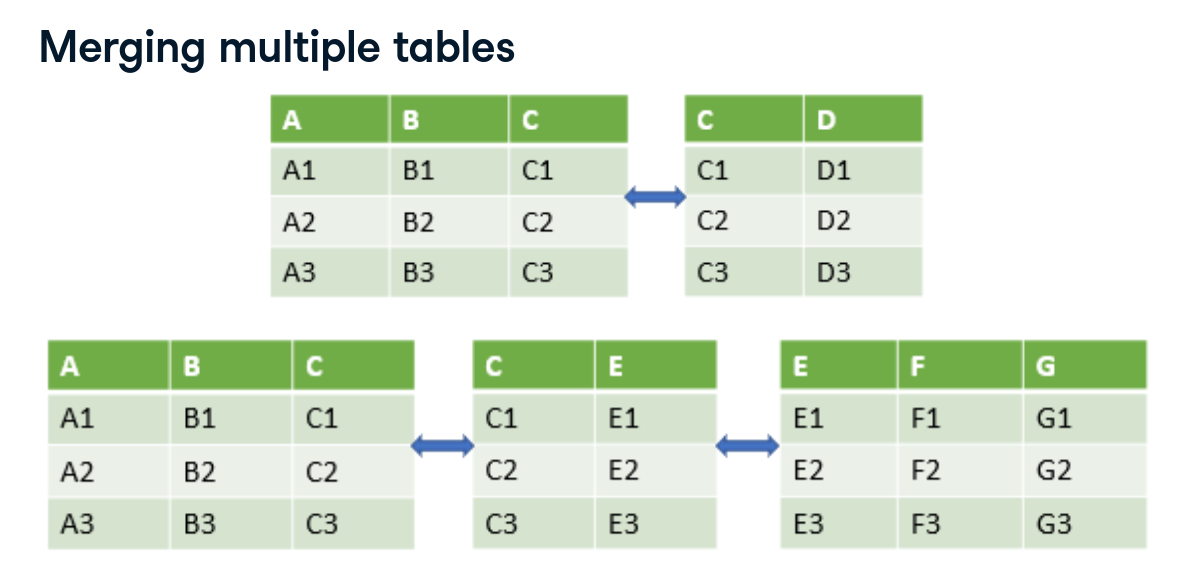
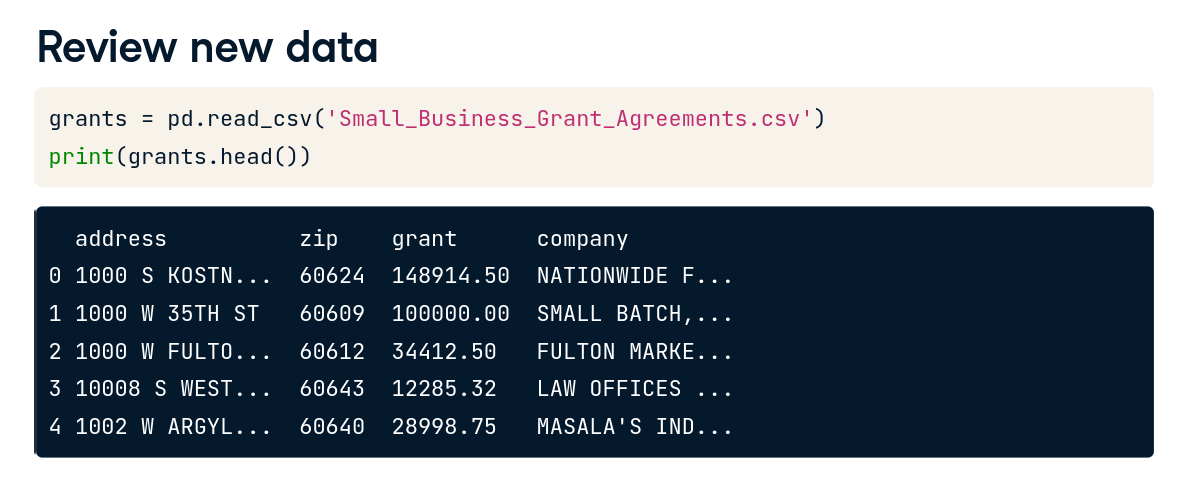
![p3.png](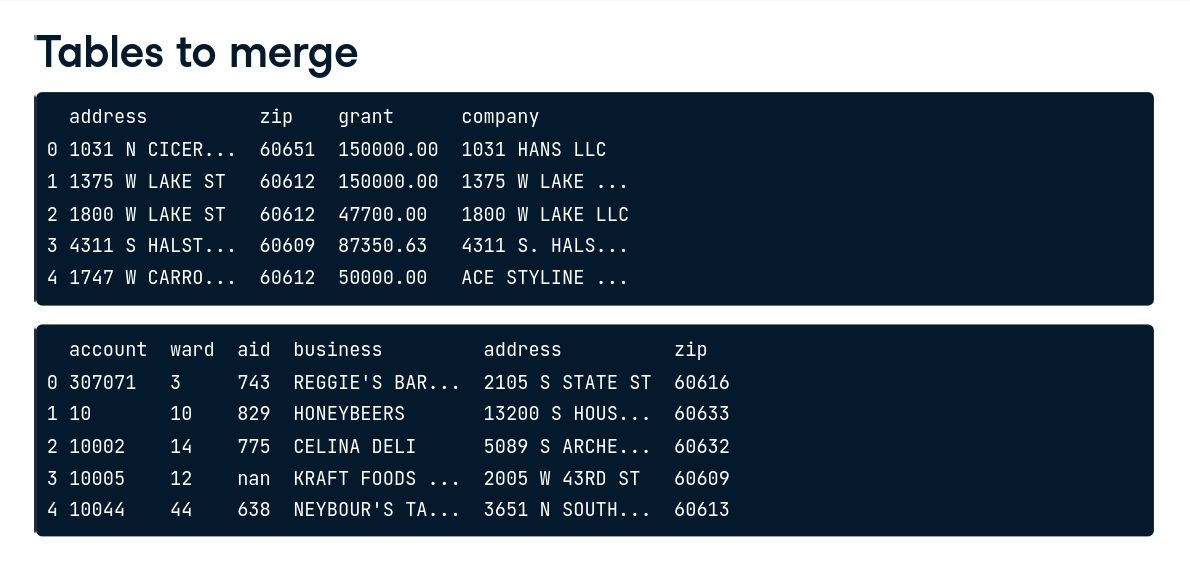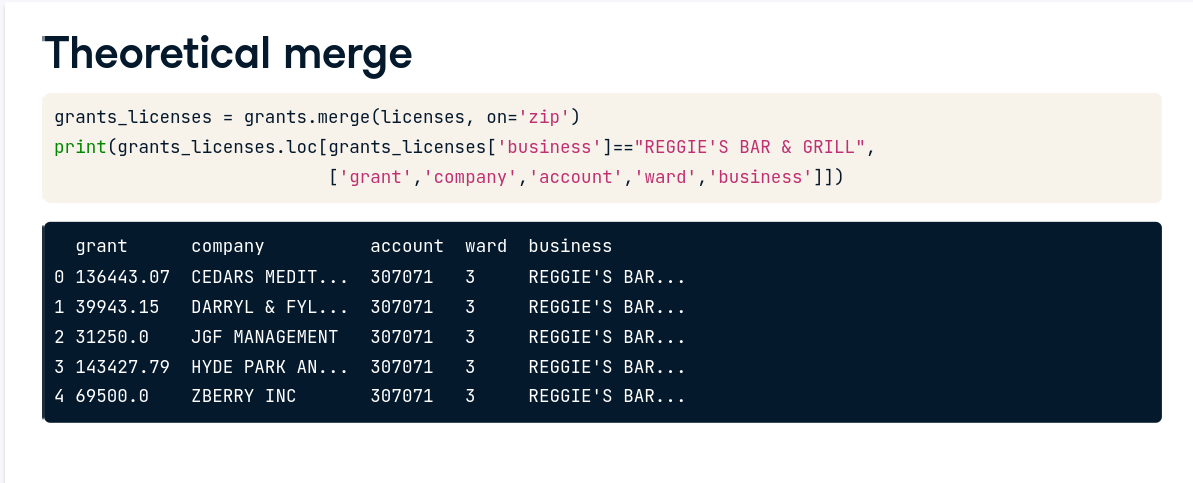)
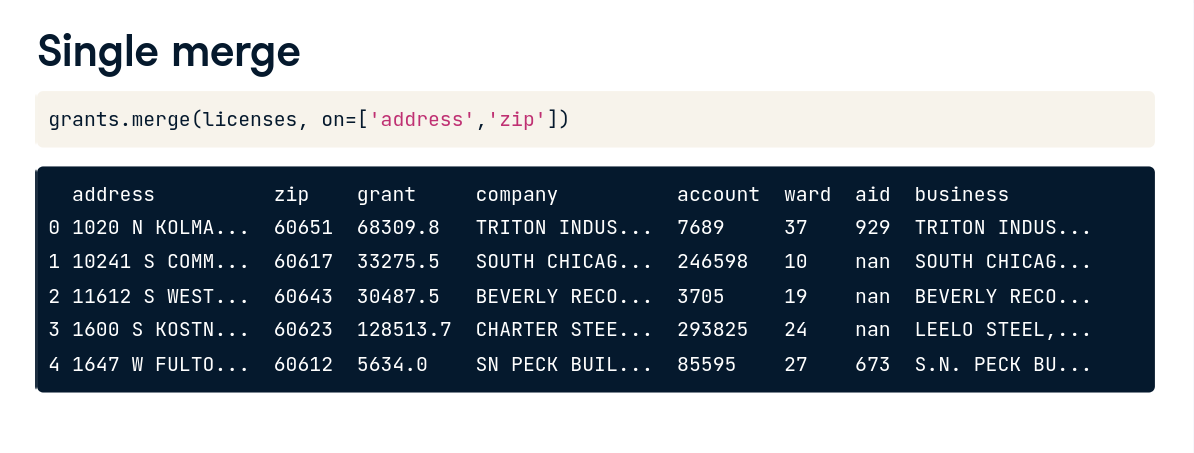
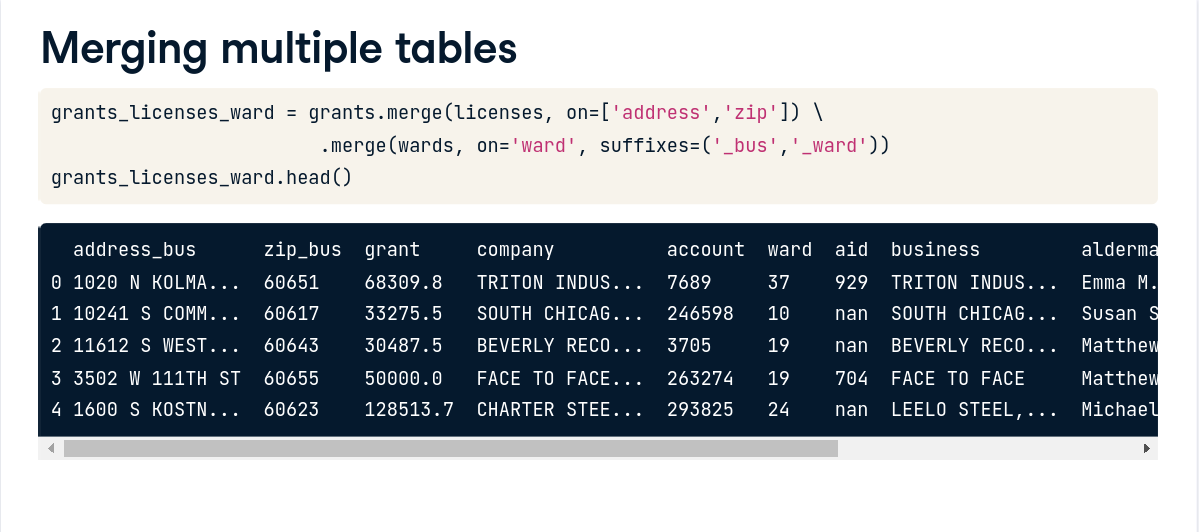
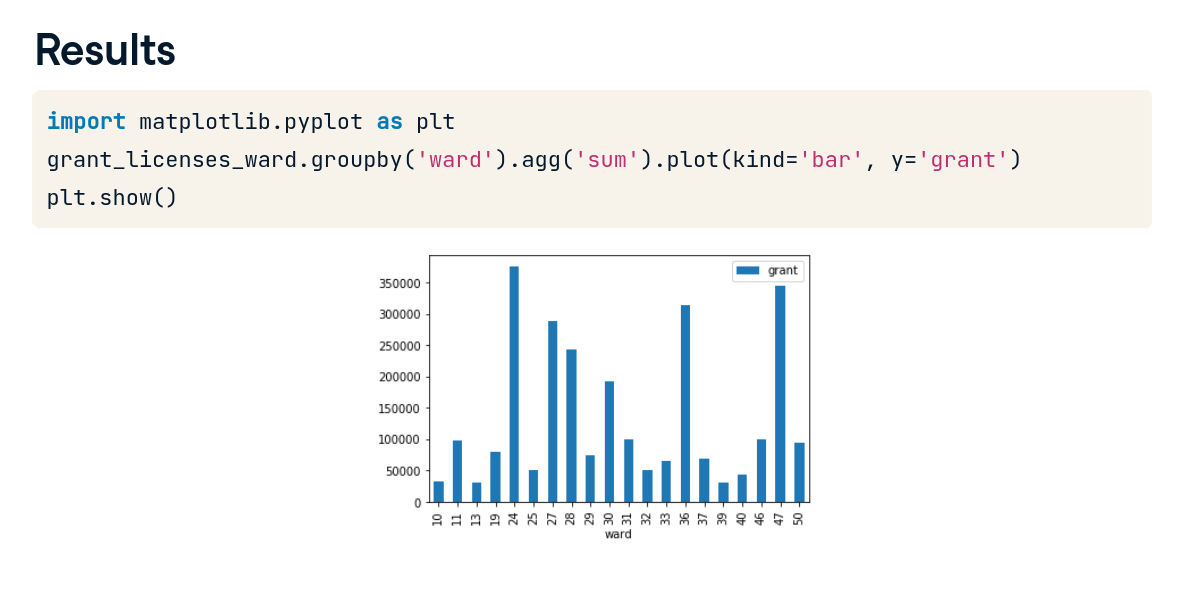
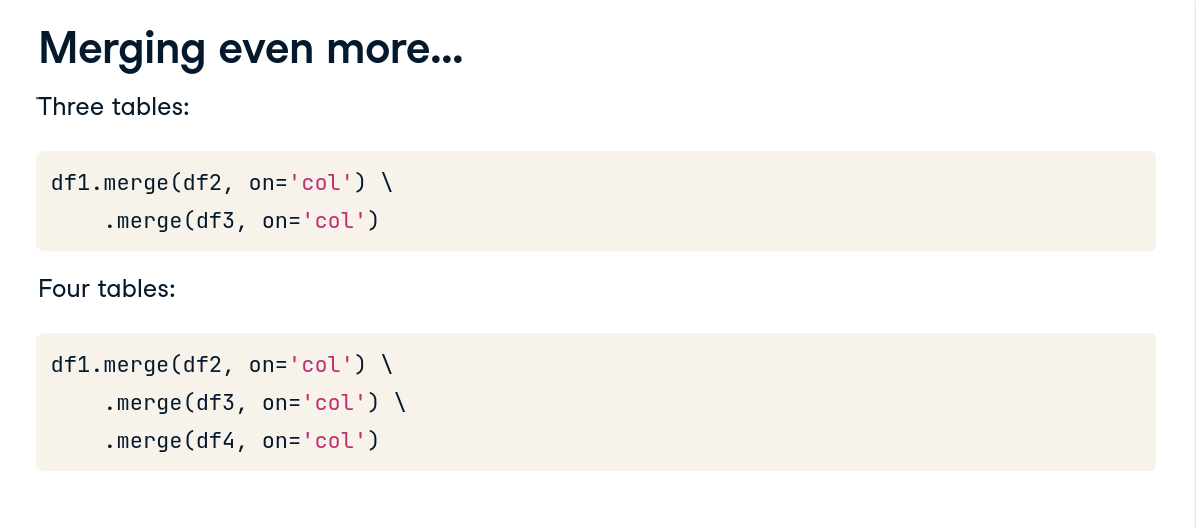

**Exercises**

In [ ]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=["year", "month", "day"])

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7)
                   & (ridership_cal_stations['day_type'] == "Weekday")
                   & (ridership_cal_stations['station_name'] == "Wilson"))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

In [ ]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on="zip") \
            			.merge(wards, on="ward")

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

In [ ]:
# Merge land_use and census on the 'ward' column
land_cen = land_use.merge(census, on="ward")

# Merge the result with licenses on the 'ward' column, using the specified suffixes
land_cen_lic = land_cen.merge(licenses, on="ward", suffixes=("_cen", "_lic"))

# Display the resulting DataFrame
print(land_cen_lic)


In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(["ward","pop_2010", "vacant"],
                                   as_index=False).agg({'account':'count'})

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'],
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'],
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())